In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
out_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [4]:
city_df = pd.DataFrame(cities)
city_df.head()

,0
0,torbay
1,nizhneyansk
2,rikitea
3,hobart
4,pimampiro


In [5]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&params&APPID={api_key}"

In [6]:

# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# call counter 
record = 1

# Log file print statement
print(f"Let's find my new Vacation Spot!")
print(f"-------------------------------")


#Loop
for city in cities:  
    
    # Try  to append calls
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Hit {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("Nope")
    continue

Let's find my new Vacation Spot!
-------------------------------
Hit 1 | Torbay
Nope
Hit 2 | Rikitea
Hit 3 | Hobart
Hit 4 | Pimampiro
Hit 5 | Busselton
Hit 6 | Qaanaaq
Nope
Hit 7 | Gamba
Hit 8 | Puerto Ayora
Hit 9 | Sabang
Hit 10 | Novobeysugskaya
Hit 11 | Kimbe
Nope
Hit 12 | Ushuaia
Hit 13 | Porto Novo
Hit 14 | Bluff
Nope
Hit 15 | Nouakchott
Hit 16 | Haines Junction
Hit 17 | Atuona
Hit 18 | Longyearbyen
Hit 19 | Jamestown
Hit 20 | Touros
Hit 21 | Port Lincoln
Hit 22 | Camacha
Nope
Hit 23 | Mana
Hit 24 | Hermanus
Hit 25 | Cidreira
Hit 26 | East London
Hit 27 | Te Anau
Hit 28 | Norman Wells
Hit 29 | Cape Town
Hit 30 | Vaini
Hit 31 | Ribeira Grande
Hit 32 | Kapaa
Hit 33 | Butaritari
Hit 34 | Kiama
Hit 35 | New Norfolk
Hit 36 | Hamilton
Hit 37 | Alofi
Hit 38 | Northam
Hit 39 | San Ramon de la Nueva Oran
Hit 40 | Kathmandu
Hit 41 | Albany
Hit 42 | Moron
Hit 43 | Bredasdorp
Hit 44 | Lyuban
Hit 45 | Tilichiki
Hit 46 | Xuddur
Hit 47 | Tambacounda
Hit 48 | Hilo
Hit 49 | Punta Arenas
Hit 50 | M

Hit 409 | Fairbanks
Hit 410 | Brae
Hit 411 | Hinganghat
Hit 412 | Srem
Nope
Nope
Hit 413 | Coquimbo
Hit 414 | Upata
Hit 415 | Lujiang
Hit 416 | Korgen
Hit 417 | Rawson
Hit 418 | Coahuayana
Hit 419 | Sabha
Hit 420 | Nortelandia
Hit 421 | Escanaba
Hit 422 | Manuk Mangkaw
Hit 423 | Buenos Aires
Hit 424 | Dabat
Hit 425 | Kloulklubed
Hit 426 | Chake Chake
Hit 427 | La Asuncion
Hit 428 | Tateyama
Hit 429 | Kenai
Hit 430 | Tiznit
Hit 431 | Srednekolymsk
Hit 432 | Vasteras
Nope
Hit 433 | Alta Floresta
Hit 434 | Gizo
Hit 435 | Shache
Hit 436 | Faanui
Hit 437 | Yishui
Nope
Hit 438 | Rameswaram
Hit 439 | Batsfjord
Hit 440 | Quatre Cocos
Hit 441 | Genhe
Hit 442 | Kalmunai
Hit 443 | Cacu
Hit 444 | Samarai
Hit 445 | Mount Darwin
Hit 446 | Soe
Hit 447 | Sola
Hit 448 | Denpasar
Hit 449 | Havre-Saint-Pierre
Hit 450 | Mount Isa
Hit 451 | Igarka
Hit 452 | Daru
Hit 453 | Togitsu
Hit 454 | Bukachacha
Hit 455 | Smidovich
Hit 456 | Hervey Bay
Nope
Nope
Hit 457 | Newport
Hit 458 | Bolshaya Dzhalga
Hit 459 | D

In [7]:

# Creating dictionary
column_names = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

In [8]:

# Create Dataframe
city_weather_data = pd.DataFrame(column_names)

# Count to make sure all rows are filled
city_weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [9]:
city_weather_data.to_csv('weather_data_CSV.csv')


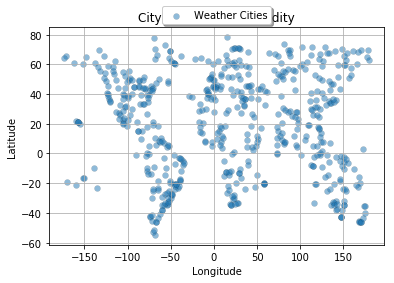

In [10]:
#Scatter plot for the selected coordinates  
plt.scatter(city_weather_data.Lng, 
            city_weather_data.Lat,
            edgecolor='black', linewidths=.15, marker="o", 
            alpha=0.5, label="Weather Cities")

# Incorporate the other graph properties
#plt.title("Selected LATS & LNGS")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True, shadow=True)
plt.grid(True)

# Show plot
plt.show()

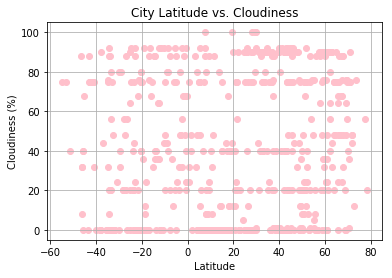

In [13]:

x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='pink', edgecolors='pink', alpha=1)

plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

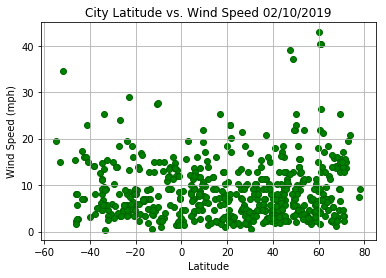

In [16]:

x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Wind Speed']

plt.scatter(x_axis, y_axis, c='green', edgecolors='darkgreen', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()